In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

df = pd.read_csv("membership_values.csv")
print(df.head())
print("Columns:", df.columns.tolist())


     x  Triangular  Trapezoidal  Gaussian
0  1.3         0.0          0.0    0.1174
1  1.4         0.0          0.0    0.1306
2  1.5         0.0          0.0    0.1449
3  1.6         0.0          0.0    0.1603
4  1.7         0.0          0.0    0.1769
Columns: ['x', 'Triangular', 'Trapezoidal', 'Gaussian']


In [10]:
print(df.columns)


Index(['x', 'Triangular', 'Trapezoidal', 'Gaussian'], dtype='object')


In [11]:
print(df)

      x  Triangular  Trapezoidal  Gaussian
0   1.3         0.0          0.0    0.1174
1   1.4         0.0          0.0    0.1306
2   1.5         0.0          0.0    0.1449
3   1.6         0.0          0.0    0.1603
4   1.7         0.0          0.0    0.1769
..  ...         ...          ...       ...
74  8.7         0.0          0.0    0.2026
75  8.8         0.0          0.0    0.1844
76  8.9         0.0          0.0    0.1673
77  9.0         0.0          0.0    0.1514
78  9.1         0.0          0.0    0.1366

[79 rows x 4 columns]


Detected columns: ['x', 'Triangular', 'Trapezoidal', 'Gaussian']


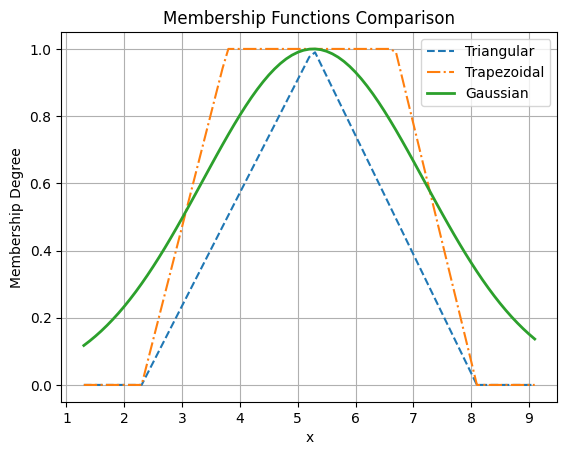

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Try reading with flexible options
df = pd.read_csv("membership_values.csv", sep=None, engine='python')
df.columns = df.columns.str.strip()  # remove extra spaces from column names

print("Detected columns:", df.columns.tolist())

# Ensure column 'x' exists
if 'x' not in df.columns:
    raise KeyError("Column 'x' not found. Check CSV content or delimiter.")

# Plot membership functions
plt.plot(df["x"], df["Triangular"], label="Triangular", linestyle='--')
plt.plot(df["x"], df["Trapezoidal"], label="Trapezoidal", linestyle='-.')
plt.plot(df["x"], df["Gaussian"], label="Gaussian", linewidth=2)

plt.title("Membership Functions Comparison")
plt.xlabel("x")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


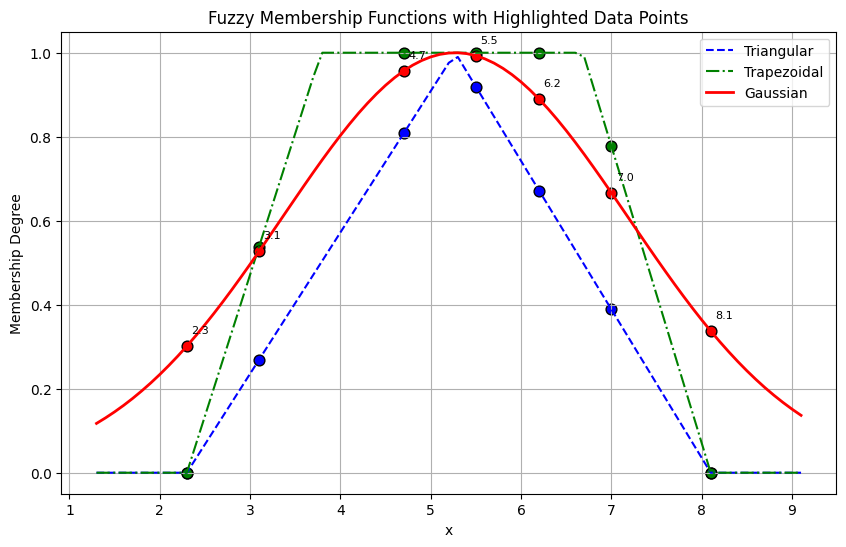

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("membership_values.csv", sep=None, engine="python")
df.columns = df.columns.str.strip()  # Clean any extra spaces

# Define the same data points used in your C++ code
test_points = [2.3, 3.1, 4.7, 5.5, 6.2, 7.0, 8.1]

# Interpolate to find membership values for the test points
def get_membership(x_vals, y_vals, x):
    return np.interp(x, x_vals, y_vals)

x_vals = df["x"].values
tri_vals = df["Triangular"].values
trap_vals = df["Trapezoidal"].values
gauss_vals = df["Gaussian"].values

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(x_vals, tri_vals, label="Triangular", linestyle='--', color='blue')
plt.plot(x_vals, trap_vals, label="Trapezoidal", linestyle='-.', color='green')
plt.plot(x_vals, gauss_vals, label="Gaussian", linewidth=2, color='red')

# Highlight test data points
for x in test_points:
    tri_y = get_membership(x_vals, tri_vals, x)
    trap_y = get_membership(x_vals, trap_vals, x)
    gauss_y = get_membership(x_vals, gauss_vals, x)

    # Plot points on each curve
    plt.scatter(x, tri_y, color='blue', s=60, edgecolor='black')
    plt.scatter(x, trap_y, color='green', s=60, edgecolor='black')
    plt.scatter(x, gauss_y, color='red', s=60, edgecolor='black')

    # Annotate one of them (Gaussian for example)
    plt.text(x + 0.05, gauss_y + 0.03, f"{x:.1f}", fontsize=8)

# Labels and title
plt.title("Fuzzy Membership Functions with Highlighted Data Points")
plt.xlabel("x")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()
